# bulbea
> Deep Learning based Python Library for Stock Market Prediction and Modelling

![](bulbea.png)

A canonical way of importing the `bulbea` module is as follows:

In [50]:
import bulbea as bb

### `bulbea.Share`

In order to analyse a desired share, we use the `Share` object defined under `bulbea` which considers 2 arguments - *the **source code** for the economic data* and *the **ticker symbol** for a said company*.

In [51]:
source, ticker = 'YAHOO', 'GOOGL'

Go ahead and create a `Share` object as follows:

In [52]:
share = bb.Share(source, ticker)

/home/achilles/dev/bulbea/.venv/py3/lib/python3.5/site-packages/bulbea-0.1.0-py3.5.egg/bulbea/entity/share.py:182: UserWarning: Environment variable BULBEA_QUANDL_API_KEY for Quandl hasn't been set. A maximum of 50000 calls per day can be made. Visit https://www.quandl.com to get your API key.
  warnings.warn(message)


By default, a `Share` object for a said source and symbol provides you historical data since a company's inception, as a `pandas.DataFrame` object. In order to access the same, use the `Share` object's member variable - `data` as follows:

In [53]:
data     = share.data
nsamples = 5
data.tail(nsamples)

,Open,High,Low,Close,Volume,Adjusted Close
Date,,,,,,
2017-03-28,839.690002,845.400024,832.270020,840.630005,1515500.0,840.630005
2017-03-29,842.750000,851.590027,841.380005,849.869995,1437000.0,849.869995
2017-03-30,851.979980,852.000000,846.770020,849.479980,948100.0,849.479980
2017-03-31,846.830017,849.559998,845.239990,847.799988,1437200.0,847.799988
2017-04-03,848.750000,859.000000,847.530029,856.750000,1967200.0,856.750000


In order to analyse a given attribute, you could plot the same as follows:

In [54]:
figsize = (20, 15)

% matplotlib inline

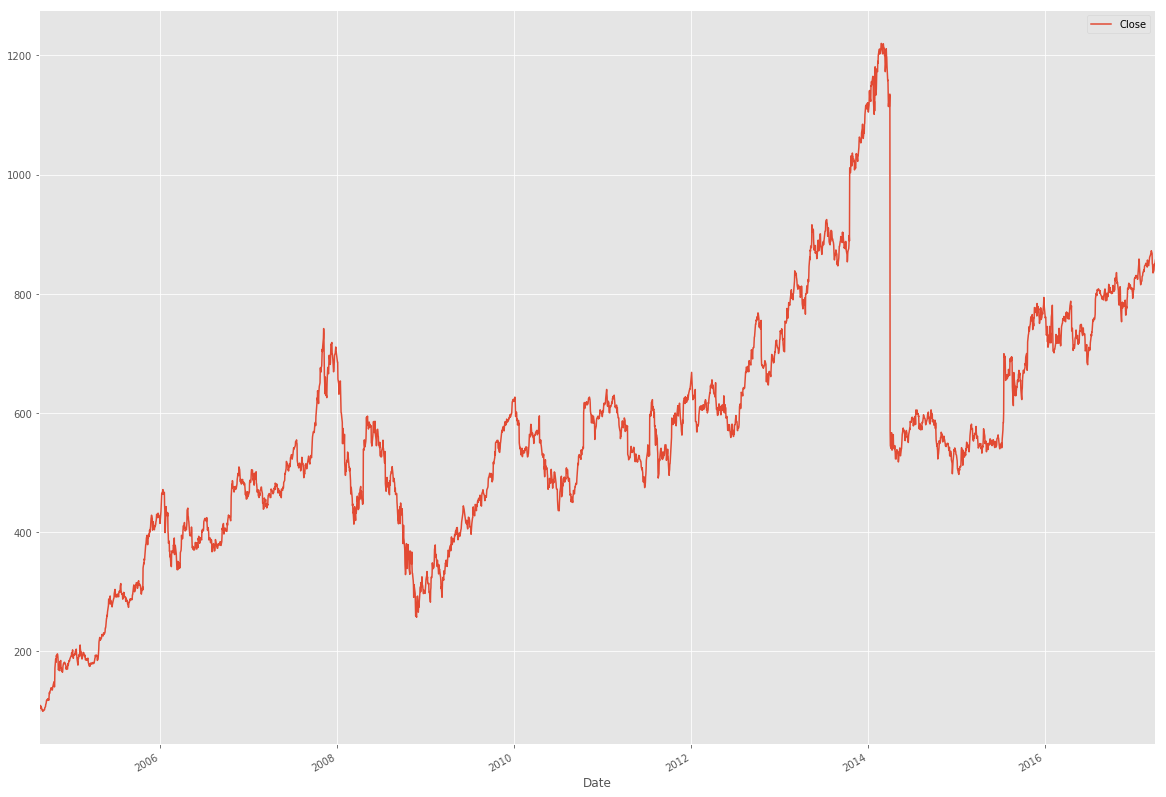

In [55]:
share.plot(figsize = figsize)

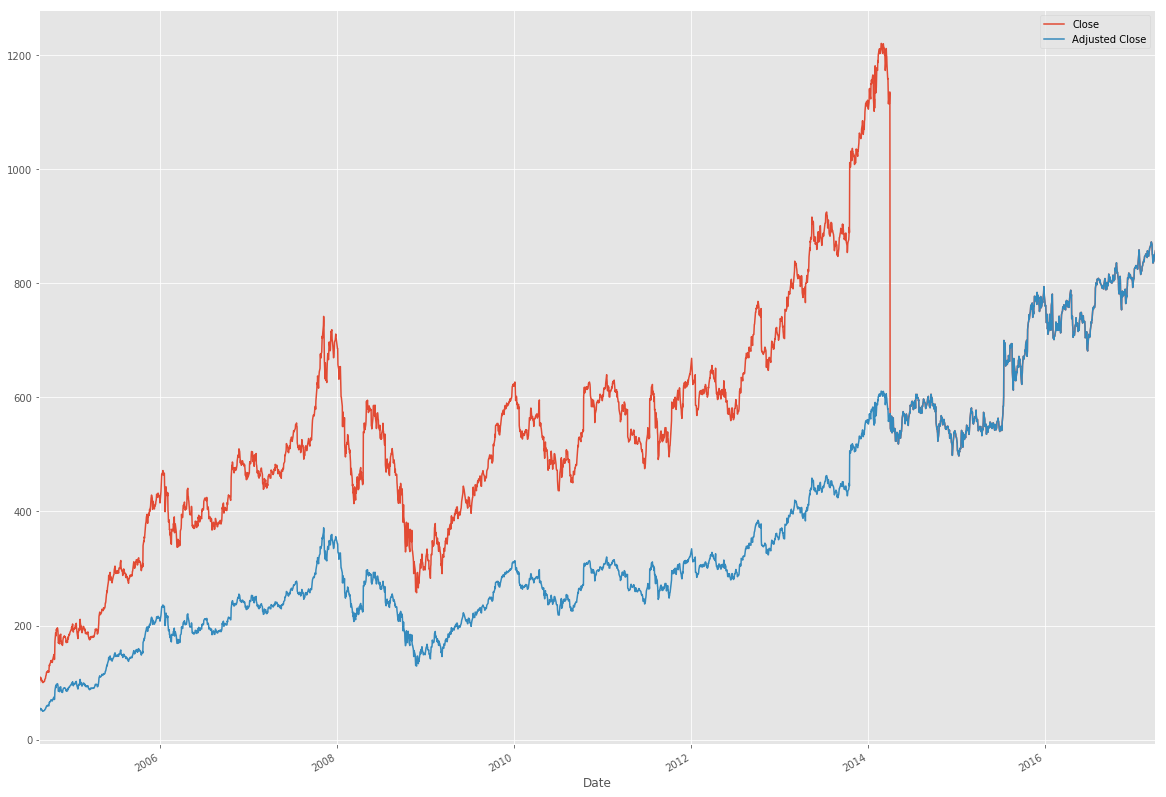

In [61]:
share.plot(['Close', 'Adjusted Close'], figsize = figsize)

### Statistics

#### Global Mean
In order to plot the **global mean** of the stock, we could do the same as follows:

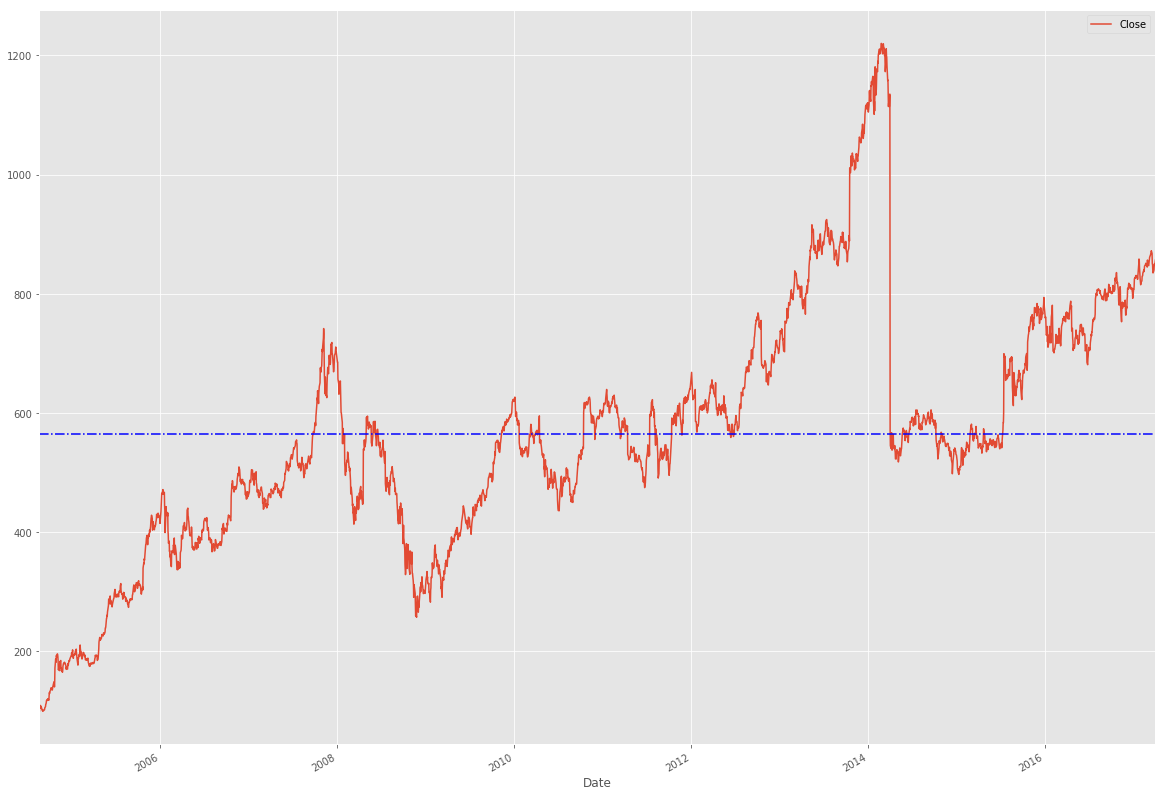

In [8]:
share.plot(figsize = (20, 15), global_mean = True)

#### Moving Averages and Bollinger Bands (R)

In [9]:
bands = share.bollinger_bands(period = 50, bandwidth = 2)
bands.tail(nsamples)

,Lower (Close),Mean (Close),Upper (Close)
Date,,,
2017-03-28,814.389992,843.916403,873.442814
2017-03-29,815.179411,844.364602,873.549793
2017-03-30,815.894620,844.773801,873.652982
2017-03-31,816.960367,845.242401,873.524436
2017-04-03,817.786215,845.814001,873.841788


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f22d6c561d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f22d6c39630>], dtype=object)

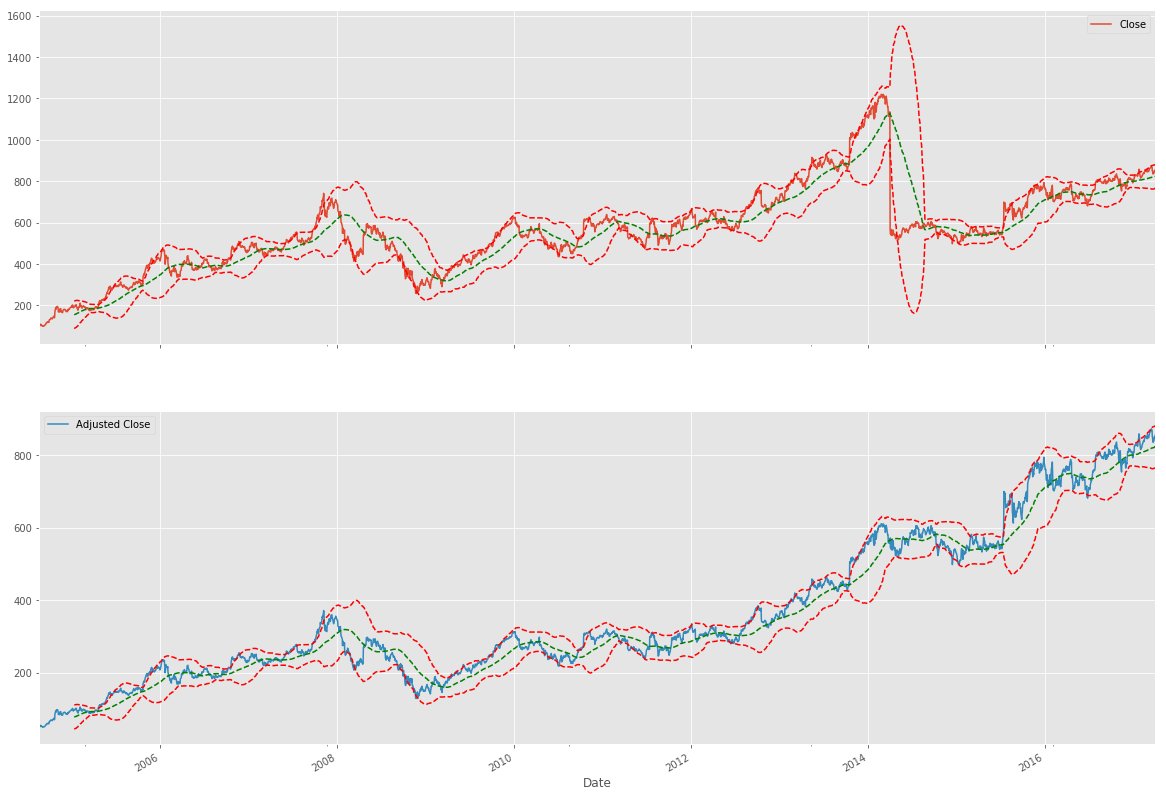

In [10]:
share.plot(['Close', 'Adjusted Close'], figsize = (20, 15), bollinger_bands = True, period = 100, bandwidth = 2)

### Training & Testing

In [11]:
from bulbea.learn.evaluation import split

In [12]:
scaler, Xtrain, Xtest, ytrain, ytest = split(share, 'Close', normalize = True)

/home/achilles/dev/bulbea/.venv/py3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/achilles/dev/bulbea/.venv/py3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [13]:
import numpy as np

In [14]:
Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], 1))
Xtest  = np.reshape(Xtest,  ( Xtest.shape[0],  Xtest.shape[1], 1))

### Modelling

In [15]:
layers      = [1, 100, 100, 1] # number of neurons in each layer
nbatch      = 512              
epochs      = 5     
nvalidation = 0.05

In [16]:
from bulbea.learn.models import RNNRegressor
from bulbea.learn.models.ann.rnn import RNNCell

Using TensorFlow backend.


In [17]:
rnn = RNNRegressor(layers)

#### TRAINING

In [18]:
rnn.fit(Xtrain, ytrain,
        batch_size       = nbatch,
        nb_epoch         = epochs,
        validation_split = nvalidation)

TypeError: fit() got an unexpected keyword argument 'batch_size'

#### TESTING

In [ ]:
predicted = rnn.predict(Xtest)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(ytest, predicted)

In [ ]:
from bulbea.entity.share import _plot_bollinger_bands
import pandas as pd
import matplotlib.pyplot as pplt

figsize          = (20, 15)
figure           = pplt.figure(figsize = figsize)

axes             = figure.add_subplot(111)

series           = pd.Series(data = scaler.inverse_transform(ytest))

# axes.plot(scaler.inverse_transform(ytest))
axes.plot(scaler.inverse_transform(predicted))

_plot_bollinger_bands(series, axes, bandwidth = 10)

### Sentiment Analysis

In [ ]:
s = bb.sentiment(share)
s